### Importing Libraries 

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests

### Reading the amazon customer review link for an LED smart TV

In [27]:
amazon='https://www.amazon.in/'
reviews='https://www.amazon.in/AmazonBasics-80cm-inch-Smart-LED/product-reviews/B087JX4TT4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

### Creating 4 empty lists, which will hold the values of each customer name, the review title, the rating and the review content they have given

In [28]:
customer_name = []
review_title = []
rate = []
review_content = []

### Requesting amazon website to get the reviews and running a loop to achieve the following:

### Extracting the customer name from the 'a-profile name' class, under the 'span' tag, of the html code
### Extracting the review title from the 'data-hook', under the 'a' tag, of the html code
### Extracting the rating from the 'review rating' class, under the 'i' tag, of the html code
### Extracting the review body from the 'data-hook', under the 'span' tag, of the html code
### Finally running a loop to find any reviews with any links. These links will be added back to the main amazon link and be considered as the new link for which, again the customer name, review title, the rating and review contengt should be extracted and put in the form of a list

In [29]:
tt = 0
while tt == 0:
    page = requests.get(reviews)
    while page.ok == False:  
        page = requests.get(reviews)
    
    
    soup = bs(page.content,'html.parser')
    soup.prettify()
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        customer_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        reviews = amazon + A
    except:
        break

In [30]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

### Checking the length of the customer_name who gave the reviews

In [31]:
len(customer_name)

258

### Checking the length of the review title for all the reviews

In [32]:
len(review_title)

258

### Checking the length of the rating for all the reviews

In [33]:
len(rate)

258

### Checking the length of the review content for all the reviews

In [34]:
len(review_content)

258

### Removing the spaces in the entire texts thats extracted from the customer review page

In [35]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

### Creating a dataframe containing all the four lists, which are extracted from the customer review page

In [58]:
amazon = pd.DataFrame()

In [59]:
amazon['Customer Name'] = customer_name
amazon['Review Title'] = review_title
amazon['Rating'] = rate
amazon['Reviews'] = review_content

In [60]:
amazon.head()

,Customer Name,Review Title,Rating,Reviews
0,Manish M.,Expectations Not Met,1.0 out of 5 stars,Picture Quality is Average. Panel is too sof...
1,Sukhbir,A good TV .,5.0 out of 5 stars,Nice picture and sound quality. A value for...
2,Bala,Good,5.0 out of 5 stars,Value for money. Excellent clarity. I bough...
3,Latha,Software Updates not working ...waste of money...,1.0 out of 5 stars,Never buy this...its waste of money...tv is ...
4,Kiron,Amazon Basics 32 inch TV for Multipurpose Use,3.0 out of 5 stars,I purchased this TV to use a both Monitor & ...


### Exporting the dataframe to a csv file

In [61]:
amazon.to_csv('amazon.csv',index = True)

### Reading the csv file that we had just exported 

In [62]:
data = pd.read_csv("amazon.csv",index_col=[0])

In [63]:
data.head()

,Customer Name,Review Title,Rating,Reviews
0,Manish M.,Expectations Not Met,1.0 out of 5 stars,Picture Quality is Average. Panel is too sof...
1,Sukhbir,A good TV .,5.0 out of 5 stars,Nice picture and sound quality. A value for...
2,Bala,Good,5.0 out of 5 stars,Value for money. Excellent clarity. I bough...
3,Latha,Software Updates not working ...waste of money...,1.0 out of 5 stars,Never buy this...its waste of money...tv is ...
4,Kiron,Amazon Basics 32 inch TV for Multipurpose Use,3.0 out of 5 stars,I purchased this TV to use a both Monitor & ...


### Creating a new column, that is a combination of the review title and the reviews, since both are texts those complement each other

In [68]:
data['text']=data['Review Title']+' '+data['Reviews']

In [69]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text
0,Manish M.,Expectations Not Met,1.0 out of 5 stars,Picture Quality is Average. Panel is too sof...,Expectations Not Met Picture Quality is Aver...
1,Sukhbir,A good TV .,5.0 out of 5 stars,Nice picture and sound quality. A value for...,A good TV . Nice picture and sound quality. ...
2,Bala,Good,5.0 out of 5 stars,Value for money. Excellent clarity. I bough...,Good Value for money. Excellent clarity. I ...
3,Latha,Software Updates not working ...waste of money...,1.0 out of 5 stars,Never buy this...its waste of money...tv is ...,Software Updates not working ...waste of money...
4,Kiron,Amazon Basics 32 inch TV for Multipurpose Use,3.0 out of 5 stars,I purchased this TV to use a both Monitor & ...,Amazon Basics 32 inch TV for Multipurpose Use ...


In [65]:
import re

### Creating a user defined function, that replaces all the numbers, special characters, punctuations etc

In [66]:
re_without_space = re.compile("(\.)|(\,)|(\{)|(\})|(\()|(\))|(\[)|(\])|(\;)|(\:)|(\!)|(\`)|(\')|(\")|(\%)|(\$)|(\<)|(\>)|(\?)|(\|)|")
re_with_space = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
def cleantext(var):
    var = re.sub('[0-9]', '', var)
    var = re.sub(r'https?:\/\/\S+', '', var)
    var = re.sub('_', '', var.lower())
    var = re_without_space.sub('', var)
    var = re_with_space.sub(' ', var)
    return var

### Creating a new column that applys the above created user defined function to clean the texts

In [70]:
data['clean1']=data['text'].apply(cleantext)

In [47]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1
0,Manish M.,Expectations Not Met,1.0 out of 5 stars,Picture Quality is Average. Panel is too sof...,Expectations Not Met Picture Quality is Aver...,expectations not met picture quality is aver...
1,Sukhbir,A good TV .,5.0 out of 5 stars,Nice picture and sound quality. A value for...,A good TV . Nice picture and sound quality. ...,a good tv nice picture and sound quality a...
2,Bala,Good,5.0 out of 5 stars,Value for money. Excellent clarity. I bough...,Good Value for money. Excellent clarity. I ...,good value for money excellent clarity i bo...
3,Latha,Software Updates not working ...waste of money...,1.0 out of 5 stars,Never buy this...its waste of money...tv is ...,Software Updates not working ...waste of money...,software updates not working waste of moneynev...
4,Kiron,Amazon Basics 32 inch TV for Multipurpose Use,3.0 out of 5 stars,I purchased this TV to use a both Monitor & ...,Amazon Basics 32 inch TV for Multipurpose Use ...,amazon basics inch tv for multipurpose use ...


In [71]:
#!pip install text2emotion 

### Importing text2emotion library, which senses the different kind of emotions in the texts

In [48]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lakshmipriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lakshmipriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lakshmipriya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Creating 5 user defined functions for different emotions to be identified on the cleaned text

In [49]:
def happy(var):
    e = te.get_emotion(var)
    return e.get('Happy')

def angry(var):
    e = te.get_emotion(var)
    return e.get('Angry')

def fear(var):
    e = te.get_emotion(var)
    return e.get('Fear')

def sad(var):
    e = te.get_emotion(var)
    return e.get('Sad')

def surprise(var):
    e = te.get_emotion(var)
    return e.get('Surprise')

In [50]:
data['Happy']=data['clean1'].apply(happy)

In [51]:
data['Angry']=data['clean1'].apply(angry)
data['Fear']=data['clean1'].apply(fear)
data['Sad']=data['clean1'].apply(sad)
data['Surprise']=data['clean1'].apply(surprise)

### Summarizing the percentage of emotion in each customer review as a new column

In [52]:
data.head()

,Customer Name,Review Title,Rating,Reviews,text,clean1,Happy,Angry,Fear,Sad,Surprise
0,Manish M.,Expectations Not Met,1.0 out of 5 stars,Picture Quality is Average. Panel is too sof...,Expectations Not Met Picture Quality is Aver...,expectations not met picture quality is aver...,0.00,0.00,0.38,0.50,0.12
1,Sukhbir,A good TV .,5.0 out of 5 stars,Nice picture and sound quality. A value for...,A good TV . Nice picture and sound quality. ...,a good tv nice picture and sound quality a...,1.00,0.00,0.00,0.00,0.00
2,Bala,Good,5.0 out of 5 stars,Value for money. Excellent clarity. I bough...,Good Value for money. Excellent clarity. I ...,good value for money excellent clarity i bo...,0.38,0.00,0.38,0.12,0.12
3,Latha,Software Updates not working ...waste of money...,1.0 out of 5 stars,Never buy this...its waste of money...tv is ...,Software Updates not working ...waste of money...,software updates not working waste of moneynev...,0.07,0.00,0.64,0.29,0.00
4,Kiron,Amazon Basics 32 inch TV for Multipurpose Use,3.0 out of 5 stars,I purchased this TV to use a both Monitor & ...,Amazon Basics 32 inch TV for Multipurpose Use ...,amazon basics inch tv for multipurpose use ...,0.15,0.15,0.50,0.05,0.15


### Visualising all the 5 emotions in the form of a pie chart along with its total percentage in all the reviews for the Smart LED TV

In [53]:
import matplotlib.pyplot as plt

In [54]:
happy_score=data['Happy'].sum()
angry_score=data['Angry'].sum()
fear_score=data['Fear'].sum()
sad_score=data['Sad'].sum()
surprise_score=data['Surprise'].sum()

In [55]:
mylabels=['happy','angry','fear','sad','surprise']

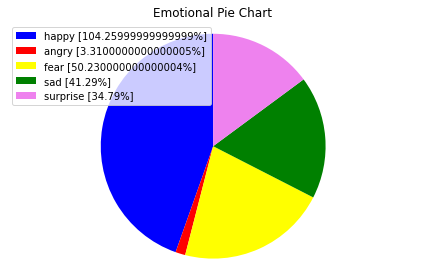

In [57]:
labels = ['happy ['+str(happy_score)+'%]', 'angry ['+str(angry_score)+'%]', 
'fear ['+str(fear_score)+'%]','sad ['+str(sad_score)+'%]','surprise ['+str(surprise_score)+'%]']

total=[happy_score,angry_score,fear_score,sad_score,surprise_score]

colors = ['blue','red','yellow','green','violet']
patches, texts = plt.pie(total, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Emotional Pie Chart")
plt.axis('equal')
plt.tight_layout()

### Conclusion

### It is understood that most of the people have given a highly positive review for the LED smart TV and about half of them are sensing a fear about the product.

### Thus, it is easier to analyse the emotion behind any product review, by using NLP